This ipython file is the project by Hongyi Tang and Weijian Li for course 12752.
There are four ipython files in the project in total. Each file consist of one cluster analysis task.
In this file, the cluster analysis is demonstrated to 2 building types.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Please download the dataset and change the file path.

In [2]:
# read in data from Commercial Building Energy Consumption Survey (CBECS)
data = pd.DataFrame.from_csv('C:/F16-12-752-master/projects/thongyi_weijian1/data/CBECS.csv') 
data.tail()

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,FKCLBTU,FKWTBTU,FKCKBTU,FKOTBTU,DHHTBTU,DHCLBTU,DHWTBTU,DHCKBTU,DHOTBTU,PUBCLIM
PUBID,,,,,,,,,,,,,,,,,,,,,
6716,3,5,14,1.0,108000,7,1,6,2,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
6717,3,7,5,1.0,1700,2,5,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6718,2,3,26,1.0,2000,2,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6719,1,2,12,1.0,19250,4,1,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6720,3,5,14,1.0,142000,7,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In this case, only two building types which is office and inpatient health care is selected. And four energy consumptions elements are always the same for all four ipython files.

In [9]:
energydata=pd.DataFrame()

type_B=[2,16] # Office and inpatient health care are selected to demonstrated cluster analysis.
type_C=[1,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,91]

data_type=data
data_type=data_type[data_type.NGUSED!=2]
for i in type_C:
    data_type=data_type[data_type.PBA!=i]
energydata['Building Type']=data_type.PBA
index=['ELBTU','NGBTU','ELVNBTU','NGHTBTU'] # Annual Electricity Consumption, Annual Natural Gas consumption, Electricity Ventilation and Natural Gas Heating
for i in index:
    energydata[i]=data_type[i]/data_type.SQFT # Normalized all the data samples.

Before cluster analysis, any row has a zero value is wiped out. And the sample number is counted.

In [10]:
energydata = energydata.dropna(how='any')
energydata = energydata[~(energydata == 0).any(axis=1)]
PBA1=energydata['Building Type'].unique()
count=[]
for i in PBA1:
    count.append([energydata[energydata['Building Type']==i].shape[0],i])
count

[[714, 2], [283, 16]]

The energy consumption pattern is plotted in box graph to help connect the cluster assignment to the building type information.

C:\Users\thong\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


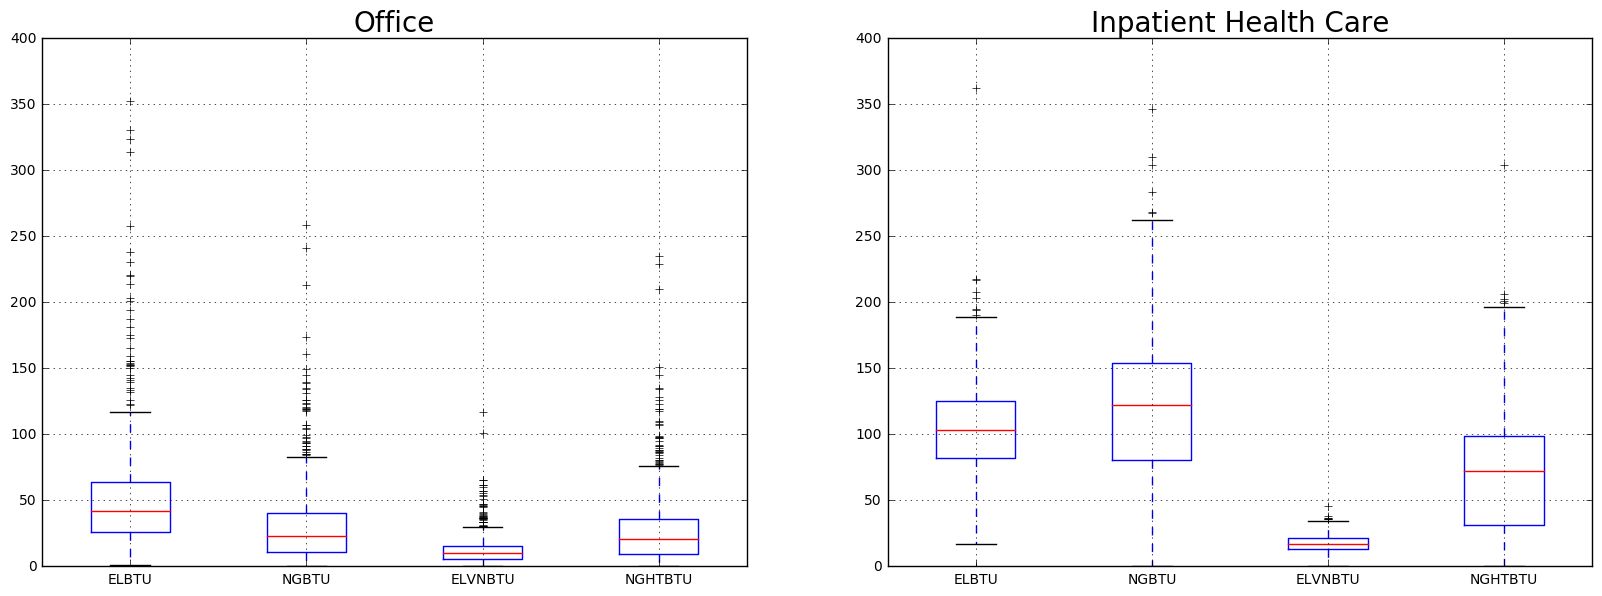

In [11]:
fig1 = plt.figure(figsize=(20,15))
times=1
data_seperate=[]
title=['Office', 'Inpatient Health Care']
# energydata[energydata['Building Type']==type_B[1]]
for i in range(len(type_B)):
    x=energydata[energydata['Building Type']==type_B[i]]
    x=x.drop(x.columns[0],axis=1)
    data_seperate.append(x) 
for i in range(len(type_B)):
    plt.subplot(len(type_B),2,times)
    data_seperate[i].boxplot()
    times=times+1
    plt.title(title[i],fontsize=20)
    plt.ylim(0,400)
    

Cluster Analysis

723
274


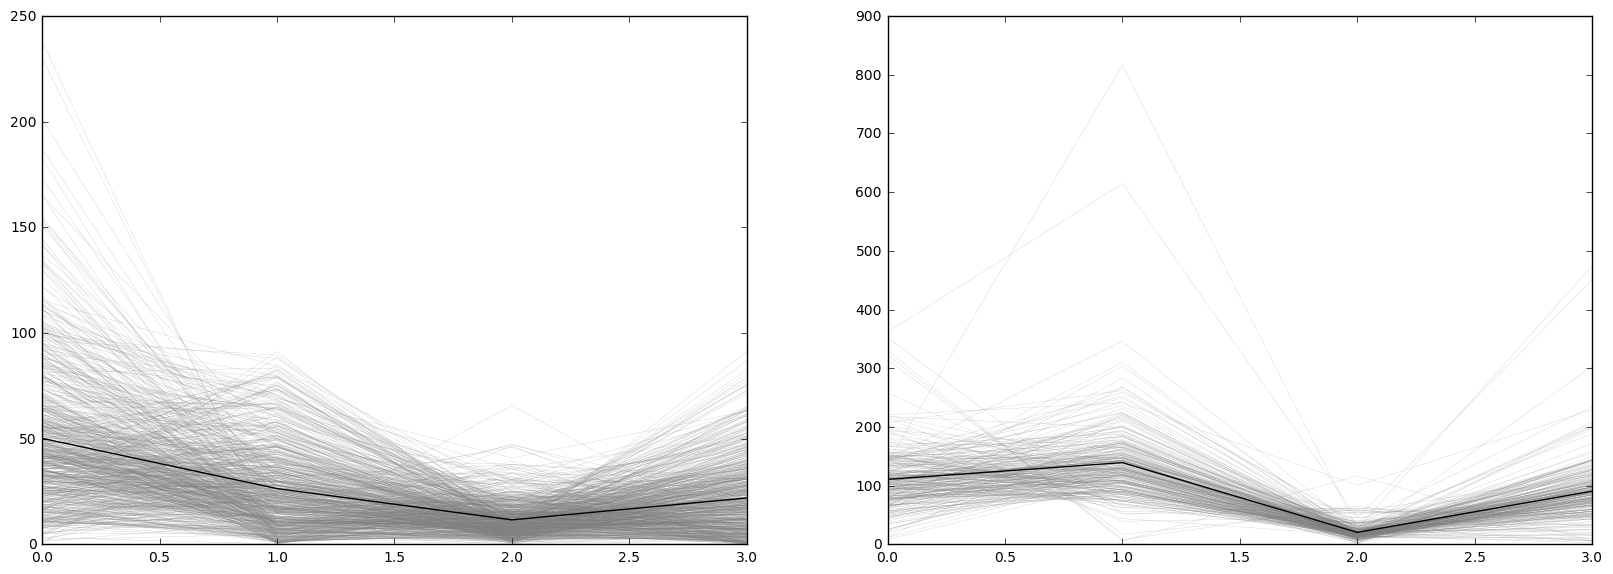

In [15]:
y=pd.DataFrame()
for i in range(len(type_B)):
    y=y.append(data_seperate[i])
X=y.as_matrix().astype(np.float32)
from sklearn.cluster import KMeans
num_clust = 2
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

Connect the cluster assignment to the building type and count the correctly assigned data samples.

In [16]:
y['assignment']=cluster_assignments
y=y.join(data['PBA'],how='inner')
y['judge']=1
y['judge'].iloc[np.where(np.array(y.PBA)==2)]=0
y['judge'].iloc[np.where(np.array(y.PBA)==16)]=1
y[y['judge']==y['assignment']].count()


C:\Users\thong\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ELBTU         860
NGBTU         860
ELVNBTU       860
NGHTBTU       860
assignment    860
PBA           860
judge         860
dtype: int64

In [33]:
a=860/(723+274)

In [34]:
a

0.8625877632898696